<a href="https://colab.research.google.com/github/kamalmukhalalaty/Data-Driven-Design-of-a-Data-Science-Masters-Curriculum/blob/main/Agglomerative_Clustering_Dendrogram_Builder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [1]:
import pandas as pd
#df= pd.read_csv('/content/Full_Job_Data_Set.csv')

from google.colab import files
uploaded = files.upload()

df= pd.read_csv('Full_Job_Data_Set_Updated_26Nov.csv')

Saving Full_Job_Data_Set_Updated_26Nov.csv to Full_Job_Data_Set_Updated_26Nov.csv


In [2]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


In [4]:
import re
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

stop_words = set(stopwords.words("english"))

corpus = []
# Pre-process dataset to get a cleaned and normalised text corpus
dataset=df
datacol='Description'
corpus = []
dataset['word_count'] = dataset[datacol].apply(lambda x: len(str(x).split(" ")))
ds_count = len(dataset.word_count)

for i in range(0, ds_count):
    # Remove punctuation
    # marks, such as period, comma, and parentheses, used in writing to separate sentences and their elements and to clarify meaning.
    text = re.sub('[^a-zA-Z]', ' ', str(dataset[datacol][i]))
    
    # Convert to lowercase
    # needed for stop words to figure things out
    text = text.lower()
    #text=re.sub('c++','cplus', text)
    text=re.sub('c#','csharp', text)
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    text=re.sub('(visualize|visualization)','visualization', text)
    text=re.sub('(business consulting|consulting)','business consulting', text)
    text=re.sub('(scikitlearn|sklearn|scikit)','sklearn', text)
    text=re.sub('(scraping|web scraping)','web scraping', text)
    text=re.sub('(pandas|panda)','panda', text)
    text=re.sub('(natural language processing|nlp)','nlp', text)
    text=re.sub('(data cleaning|preprocessing|cleaning data|clean data|data preprocessing)','data preprocessing', text)
    text=re.sub('(neural network|neural net)','neural network', text)
    # Convert to list from string
    # i guess this splits each word into a list entry
    text = text.split()
    
    # Stemming
    # Stemming is a process where words are reduced to a root by removing inflection through dropping unnecessary characters, 
    # usually a suffix. There are several stemming models, including Porter and Snowball
    ps=PorterStemmer()
    
    # Lemmatisation

    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

#for i in range(0, len(df)):
  #corpus = []
  #corpus.append(df['Description'][i])
  #corpus[i] = re.sub("(\\d|\\W)+"," ",corpus[i])
  #text=re.sub("(\\d|\\W)+"," ",text) #remove any remaining special characters
  #df[col][i] = text
        #print(df[col][i])
#text=["The purpose of the current study was to examine the painful elbow, and in particular enthesitis, in psoriatic arthritis PsA and rheumatoid arthritis RA using clinical examination, ultrasonography US and magnetic resonance imaging MRI. Patients with elbow pain 11 with PsA and 9 with RA were recruited. Clinical examination, US and MRI studies were performed on the same day. For enthesitis, the common extensor and flexor insertions and the triceps insertion were imaged 20 patients, giving a total of 60 sites with comparative data. Imaging was performed with the radiologists blinded to the diagnosis and clinical findings. US was used to assess inflammatory activity Power Doppler signal, oedema, tendon thickening and bursal swelling and damage erosions, cortical roughening and enthesophytes. MRI was used to assess inflammation fluid in paratenon, peri-entheseal soft-tissue oedema, entheseal enhancement with gadolinium, entheseal oedema and bone oedema and damage erosion, cortical roughening and enthesophyte. Complete scan data were not available for all patients as one patient could not tolerate the MRI examination. No significant differences in imaging scores were found between PsA an d RA. Analysis of damage scores revealed complete agreement between US and MRI data in 43/55 78% comparisons; in 10/55 18% cases the US data were abnormal but the MRI data normal; in 2/55 4% cases, the MRI data were abnormal and the US data normal. Analysis of the inflammation scores revealed complete agreement between US and MRI data in 33/55 60% comparisons; in 3/55 5% cases US data were abnormal but MRI data normal; in 19/55 35% cases the MRI data were abnormal and the US data normal. There was a poor relationship between assessments based on clinical examination and imaging studies. Readers could not accurately identify the disease from imaging findings."]

#corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
#Second Attempt:
'''
import re
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

stop_words = set(stopwords.words("english"))

corpus = []
# Pre-process dataset to get a cleaned and normalised text corpus
dataset=df
datacol='Description'
corpus = []
dataset['word_count'] = dataset[datacol].apply(lambda x: len(str(x).split(" ")))
ds_count = len(dataset.word_count)

for i in range(0, ds_count):
    # Remove punctuation
    # marks, such as period, comma, and parentheses, used in writing to separate sentences and their elements and to clarify meaning.
    text = re.sub('[^a-zA-Z]', ' ', str(dataset[datacol][i]))
    
    # Convert to lowercase
    # needed for stop words to figure things out
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    # i guess this splits each word into a list entry
    text = text.split()

    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in       # also removing stop words here
              stop_words]
    

  # Stemming
      # Stemming is a process where words are reduced to a root by removing inflection through dropping unnecessary characters,
      # usually a suffix. There are several stemming models, including Porter and Snowball
    ps=PorterStemmer()
    text = [ps.stem(word) for word in text if not word in       # also removing stop words here
              stop_words]

    text = ' '.join(text)  # go back from a list to text and basically join words with a space
    corpus.append(text)
    '''

'\nimport re\nimport nltk\n\nnltk.download(\'stopwords\')\nnltk.download(\'wordnet\')\n\nfrom nltk.corpus import stopwords\nfrom nltk.stem.porter import PorterStemmer\nfrom nltk.tokenize import RegexpTokenizer\nfrom nltk.stem.wordnet import WordNetLemmatizer\n\nstop_words = set(stopwords.words("english"))\n\ncorpus = []\n# Pre-process dataset to get a cleaned and normalised text corpus\ndataset=df\ndatacol=\'Description\'\ncorpus = []\ndataset[\'word_count\'] = dataset[datacol].apply(lambda x: len(str(x).split(" ")))\nds_count = len(dataset.word_count)\n\nfor i in range(0, ds_count):\n    # Remove punctuation\n    # marks, such as period, comma, and parentheses, used in writing to separate sentences and their elements and to clarify meaning.\n    text = re.sub(\'[^a-zA-Z]\', \' \', str(dataset[datacol][i]))\n    \n    # Convert to lowercase\n    # needed for stop words to figure things out\n    text = text.lower()\n    \n    # Remove tags\n    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",t

In [6]:
corpus[29]

'experience data scripting language e g sql python r etc excellent verbal written communication data presentation skill including ability'

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim import corpora, models, similarities
from collections import defaultdict
import csv
from nltk import sent_tokenize, word_tokenize, pos_tag
import nltk
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re
import gensim
from sklearn import manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection
from sklearn.cluster import KMeans
from matplotlib.colors import LinearSegmentedColormap
from string import punctuation
import logging
from pprint import pprint  # pretty-printer

In [8]:
'''
vec = TfidfVectorizer(#tokenizer=textblob_tokenizer,
                      stop_words='english',
                      norm='l1',
                      use_idf=True)
'''
vec = CountVectorizer(token_pattern = r"(?u)\b\w+\b", ngram_range=(1,2), max_features=100966)
matrix = vec.fit_transform(corpus)
what = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())


In [10]:
#corpus

In [11]:
what.head()

,aa,aa blue,aa f,aa raventek,aa supervis,aaa,aaa multiplayer,aaarl,aaarl help,aapoon,aapoon digital,aapsjob,aapsjob title,ab,ab apply,ab calgary,ab canada,ab edmonton,ab initio,ab major,ab member,ab month,ab network,ab november,ab ove,ab p,ab quarterly,ab role,ab seeking,ab toronto,ab yyc,abac,abac data,abap,abap bi,abap development,abap hand,abap proxy,abap user,abap webdynpro,...,zip gotta,zlmt,zlmt eoe,zombie,zombie come,zone,zone cape,zone connects,zone data,zone deliverable,zone eastern,zone leading,zone provincial,zone responsible,zone strong,zoom,zoom est,zoom go,zoom growing,zoom however,zoom requires,zoom rule,zoom success,zoom surfacing,zurich,zurich data,zybooks,zybooks platform,zynga,zynga consider,zynga data,zynga equal,zynga game,zynga leading,zynga poker,zynga provides,zynga stock,zynga zynga,zzz,zzz temporary
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
#L_list = ['panda','python', 'r', 'java', 'javascript', 'scala', 'c', 'php', 'sql', 'nosql', 'julia', 'lisp','hadoop','zoho', 'hpcc', 'storm', 'qubole', 'cassandra', 'statwing', 'couchdb', 'pentaho', 'flink', 'cloudera', 'kaggle', 'rapidminer', 'hive', 'tensorflow', 'pytorch', 'keras', 'pandas', 'sklearn','scikit', 'plotly', 'numpy', 'nltk', 'scipy', 'matplotlib', 'seaborn', 'statsmodels', 'scrapy', 'xgboost', 'bokeh', 'pydot', 'theano', 'matlab','django','json','spark']

In [13]:
#Software Libraries  go into softlib
'''
softlib = ['panda',  'impala', 'hadoop', 'qubole', 'cassandra', 'apache', 
           'pentaho', 'cloudera','rapidminer', 'hive', 'tensorflow', 'pytorch', 'sklearn','scikit', 'azure', 'aws',
           'plotly', 'numpy', 'nltk', 'scipy', 'matplotlib', 'seaborn', 'statsmodels', 'scrapy', 'theano','django','spark']
           https://www.edureka.co/blog/machine-learning-libraries/
           https://medium.com/@ODSC/top-7-machine-learning-frameworks-for-2020-7e45164914e1
        
'''

softlib = ['tensorflow',  'pytorch', 'caffe', 'numpy', 'hadoop', 'tableau', 
           'panda', 'statsmodels', 'apache',  'hive', 'scipy',  'azure', 'pyspark']  #'excel',

#langauges go into langlist

langlist = ['python', 'r', 'java', 'javascript', 'scala', 'c', 'php', 'sql', 'spark',
            'julia','nosql',  'storm',  'matlab', 'ruby']

#Skills go into list
'''
https://www.cio.com/article/3263790/the-essential-skills-and-traits-of-an-expert-data-scientist.html
https://medium.com/@ODSC/top-data-science-skills-for-2020-34c2a9d2fc25
https://www.indeed.com/career-advice/resumes-cover-letters/computer-coding-skills
skills_list = ['communication', 'visualization', 'cloud computing', 'teamwork', 'presentation', 'artificial intelligence', 
               'big data', 'statistical analysis', 'project management', 'business consulting', 'deep learning',
               'creativity', 'negotiation', 'data management', 'web development', 'blockchain', 'leadership', 'organization', 'software development']
'''
#data is a stop words - 'big data', 'deep learning', 'data mining', 'data mining', data management', ''data storytelling', 'data pipeline', 'research', 'data engineering',
#'software development', 'team', 'presentation',  'business analysis', 'problem solving', 'experiment', 
skills_list = ['communication', 'visualization software', 'cloud computing', 
                'statistical analysis', 'project management', 'business consulting',
                'negotiation',  'web development', 'leadership', 'organization', 
               'risk analysis', 'critical thinking',
                  'optimization',  'nlp']  #'simulation',

interest_list = ['data preprocessing', 'sklearn', 'web scraping', 'blockchain', 'aws', 'matplotlib', 'seaborn', 'nltk', 'html', 'visualization' ]
# 'preprocessing'
               

In [14]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

def get_hi(L_list, what):
  hi = pd.DataFrame()
  working_list = L_list
  hi = what[working_list]
  return hi


###Seperate Attempt at Dendogram
#hi.head()
def get_dendrogram(hi):
  hi_T = hi.T

  #I'm a dummy
  dummy = hi_T.copy(deep = True)

  #plt.figure(figsize = (12,8))
  #dend = shc.dendrogram(shc.linkage(data_scaled, method=‘ward’))
  den = shc.dendrogram(shc.linkage(dummy, method='ward'), orientation = 'right',
  labels = dummy.index)
  return den

In [15]:
softlib_df = get_hi(softlib, what)
softlib_df.head()
a=softlib_df.sum().sort_values(ascending=False).index
softlib_df=softlib_df.reindex(columns=a)
softlib_df.iloc[:5,:10]

,tableau,hadoop,azure,tensorflow,hive,panda,pytorch,numpy,apache,scipy
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [16]:
skills_df = get_hi(skills_list, what)
skills_df.head()

a=skills_df.sum().sort_values(ascending=False).index
skills_df=skills_df.reindex(columns=a)
skills_df.iloc[:5,:10]

,communication,organization,leadership,business consulting,nlp,optimization,project management,statistical analysis,cloud computing,critical thinking
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [17]:
lang_df = get_hi(langlist, what)
lang_df.head()
a=lang_df.sum().sort_values(ascending=False).index
lang_df=lang_df.reindex(columns=a)
lang_df.iloc[:5,:10]

,r,python,sql,c,spark,java,scala,nosql,matlab,javascript
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [18]:
interest_df = get_hi(interest_list, what)
interest_df.head()
a=interest_df.sum().sort_values(ascending=False).index
interest_df=interest_df.reindex(columns=a)
interest_df.iloc[:5,:10]

,visualization,aws,sklearn,data preprocessing,html,nltk,blockchain,matplotlib,seaborn,web scraping
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [19]:
full_table = pd.DataFrame()
list1 = skills_df.columns[:10].tolist()
#print(list1)
list2 = lang_df.columns[:10].tolist()
#print(list2)
list3 = softlib_df.columns[:10].tolist()
#print(list3)
list4 = interest_df.columns[:10].tolist()

listtot = list1 + list2 + list3+list4
print(listtot)
full_table = get_hi(listtot, what)
'''
full = skills_list + langlist + softlib

full_table = get_hi(full, what)

a=full_table.sum().sort_values(ascending=False).index
full_table=full_table.reindex(columns=a)
full_table.iloc[:5,:20]
'''
full_table.head()

['communication', 'organization', 'leadership', 'business consulting', 'nlp', 'optimization', 'project management', 'statistical analysis', 'cloud computing', 'critical thinking', 'r', 'python', 'sql', 'c', 'spark', 'java', 'scala', 'nosql', 'matlab', 'javascript', 'tableau', 'hadoop', 'azure', 'tensorflow', 'hive', 'panda', 'pytorch', 'numpy', 'apache', 'scipy', 'visualization', 'aws', 'sklearn', 'data preprocessing', 'html', 'nltk', 'blockchain', 'matplotlib', 'seaborn', 'web scraping']


,communication,organization,leadership,business consulting,nlp,optimization,project management,statistical analysis,cloud computing,critical thinking,r,python,sql,c,spark,java,scala,nosql,matlab,javascript,tableau,hadoop,azure,tensorflow,hive,panda,pytorch,numpy,apache,scipy,visualization,aws,sklearn,data preprocessing,html,nltk,blockchain,matplotlib,seaborn,web scraping
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
listtot2 = ['communication', 'organization', 'leadership', 'business consulting',
            'statistical analysis', 'r', 'python', 'sql', 'c', 'spark', 'java', 'scala', 'nosql', 'matlab', 'javascript', 'tableau', 'hadoop', 'azure',
            'tensorflow', 'hive', 'panda', 'pytorch', 'numpy', 'apache', 'scipy', 'aws', 'sklearn', 'data preprocessing', 'html', 
            'nltk', 'blockchain', 'matplotlib', 'seaborn', 'web scraping']
full_table = get_hi(listtot2, what) #'nlp',

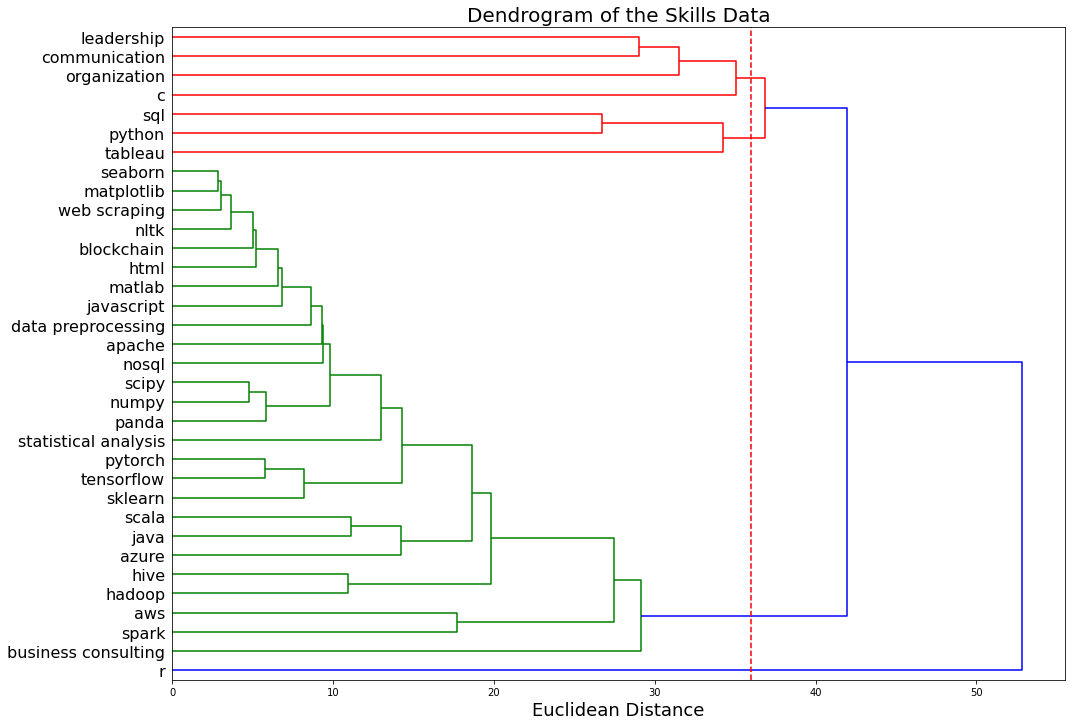

In [21]:
plt.figure(figsize = (16,12))
oh_no = get_dendrogram(full_table)
plt.xlabel('Euclidean Distance', fontsize = 18)
plt.yticks(fontsize = 16)
plt.title('Dendrogram of the Skills Data', fontsize = 20)
plt.axvline(x = 36, color='r', linestyle='--') #gives 2 clusters
plt.show()

In [22]:
pd.set_option(max_colwidth= 200) # options.max_colwidth = 200
pd.options.display.max_colwidth


ValueError: ignored

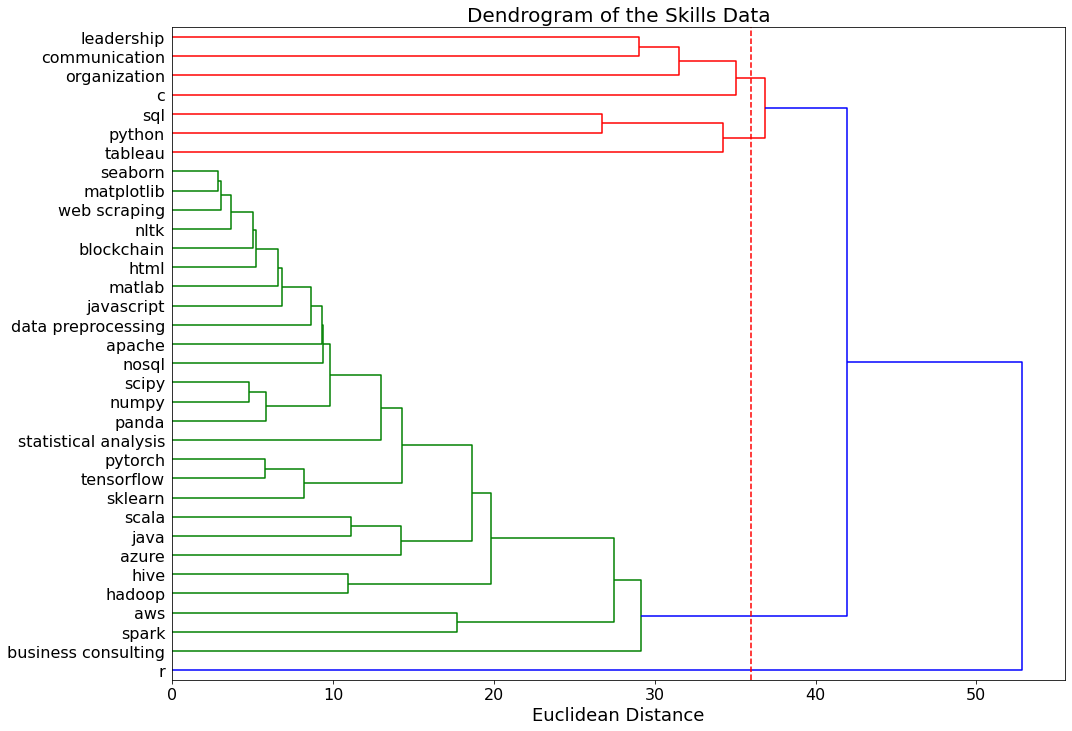

In [23]:
plt.figure(figsize = (16,12))
oh_no = get_dendrogram(full_table)
plt.xlabel('Euclidean Distance', fontsize = 18)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.title('Dendrogram of the Skills Data', fontsize = 20)
plt.axvline(x = 36, color='r', linestyle='--') #gives 2 clusters
plt.show()

### Above is our final dendrogram. THe rest is rough. 

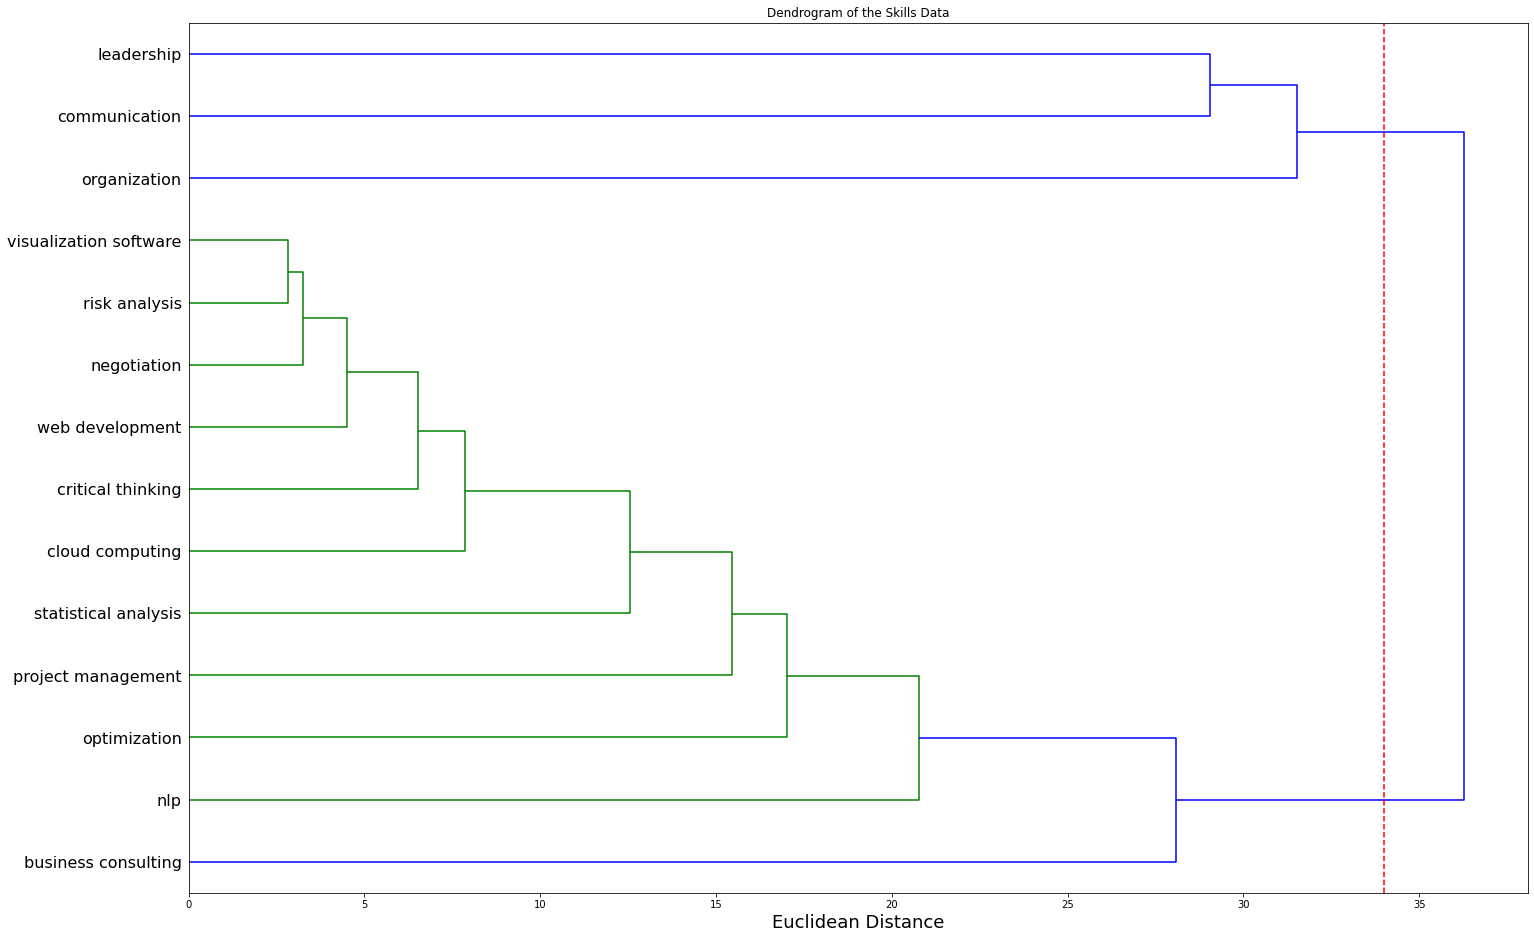

In [25]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

###Seperate Attempt at Dendogram
#hi.head()
def get_dendrogram(hi):
  hi_T = hi.T

  #I'm a dummy
  dummy = hi_T.copy(deep = True)

  #plt.figure(figsize = (12,8))
  #dend = shc.dendrogram(shc.linkage(data_scaled, method=‘ward’))
  den = shc.dendrogram(shc.linkage(dummy, method='ward'), orientation = 'right',
  labels = dummy.index)
  return den
plt.figure(figsize = (24,16))
den_sk = get_dendrogram(skills_df)

plt.xlabel('Euclidean Distance', fontsize = 18)
plt.yticks(fontsize = 16)
plt.title('Dendrogram of the Skills Data')
plt.axvline(x = 34, color='r', linestyle='--') #gives 2 clusters
plt.show()

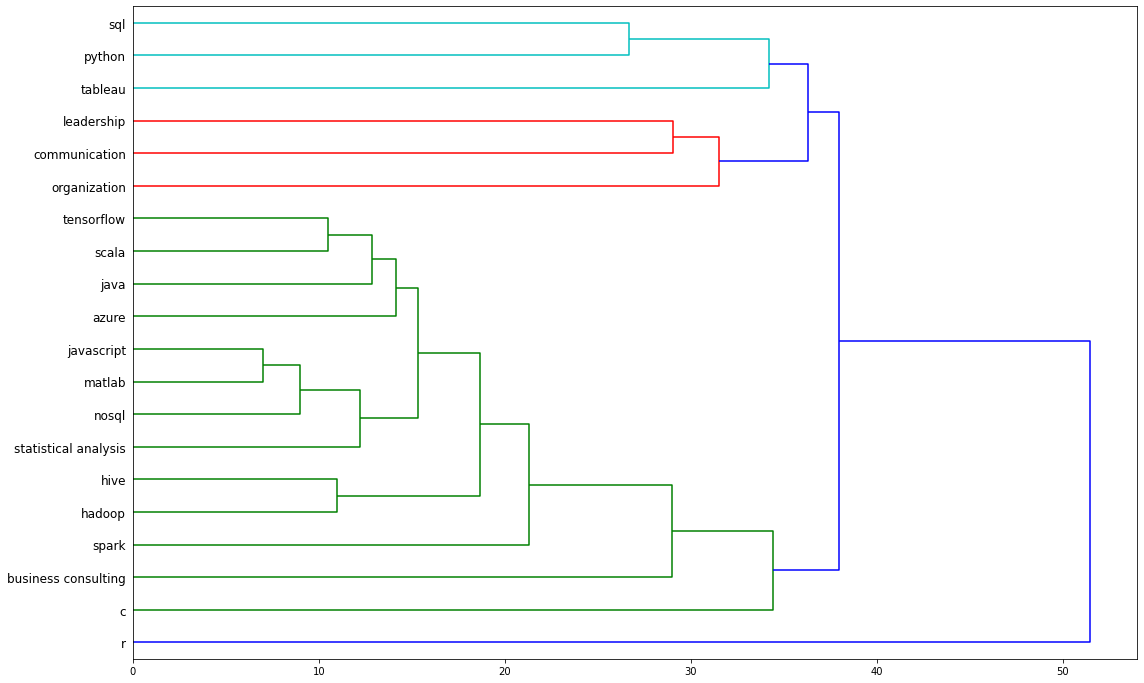

In [26]:
#Get TOP 20 for all

new_table = pd.DataFrame()
new_table = full_table.iloc[:, :20]
new_table.head()

plt.figure(figsize = (18,12))
new = get_dendrogram(new_table)

In [27]:
two_table = pd.DataFrame()
two = softlib + langlist

two_table = get_hi(two, what)


new2_table = pd.DataFrame()
new2_table = two_table.iloc[:, :20]

#two_dend = get_dendrogram(two_table)
#plt.xlabel('Euclidean Distance', fontsize = 14)
#plt.yticks(fontsize = 14)
#plt.title('Dendrogram of Job Skills and Coding Languages')
#plt.axvline(x = 36, color='r', linestyle='--')
#plt.show()
new2_table.head()



,tensorflow,pytorch,caffe,numpy,hadoop,tableau,panda,statsmodels,apache,hive,scipy,azure,pyspark,python,r,java,javascript,scala,c,php
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


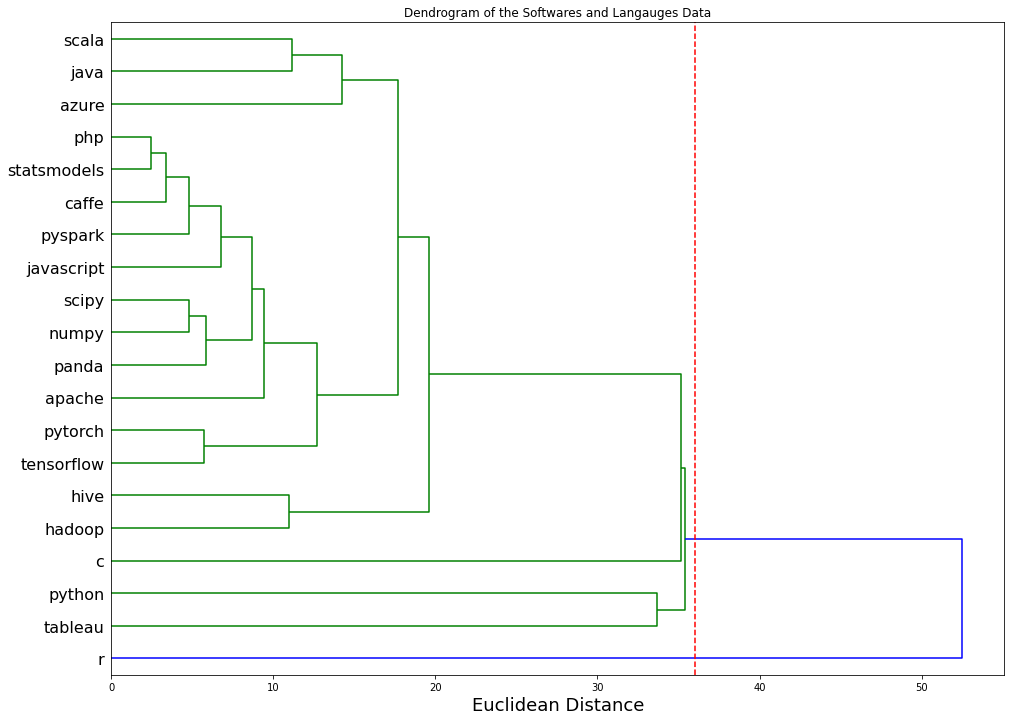

In [28]:
plt.figure(figsize = (16,12))
why_me = get_dendrogram(new2_table)
plt.xlabel('Euclidean Distance', fontsize = 18)
plt.yticks(fontsize = 16)
plt.title('Dendrogram of the Softwares and Langauges Data')
plt.axvline(x = 36, color='r', linestyle='--') #gives 2 clusters
plt.show()

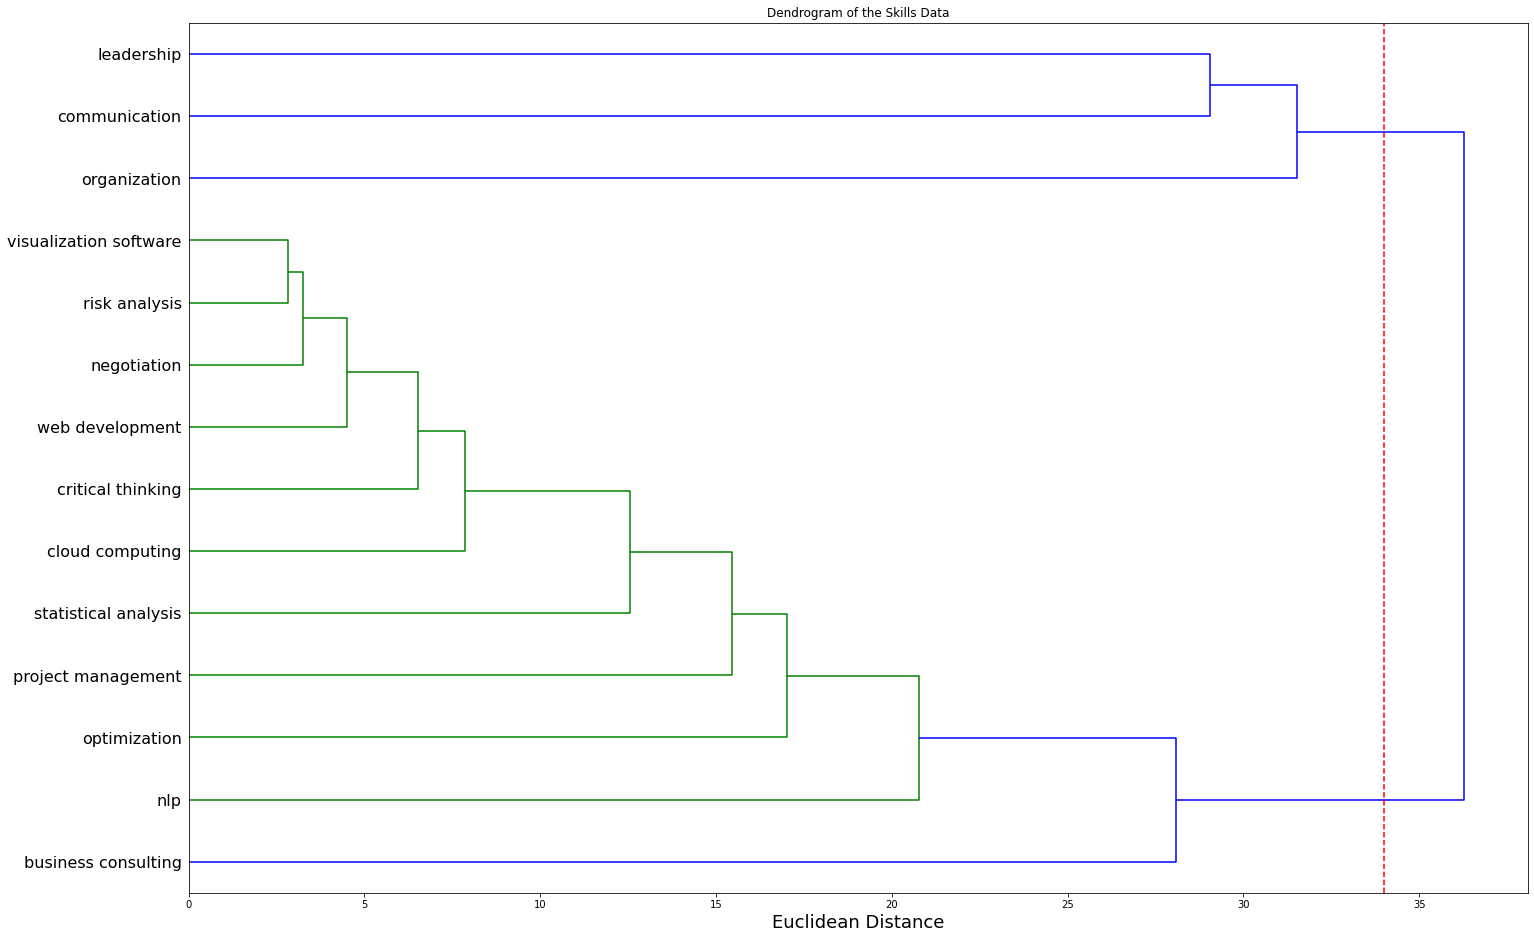

In [29]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

###Seperate Attempt at Dendogram
#hi.head()
def get_dendrogram(hi):
  hi_T = hi.T

  #I'm a dummy
  dummy = hi_T.copy(deep = True)

  #plt.figure(figsize = (12,8))
  #dend = shc.dendrogram(shc.linkage(data_scaled, method=‘ward’))
  den = shc.dendrogram(shc.linkage(dummy, method='ward'), orientation = 'right',
  labels = dummy.index)
  return den
plt.figure(figsize = (24,16))
den_sk = get_dendrogram(skills_df)

plt.xlabel('Euclidean Distance', fontsize = 18)
plt.yticks(fontsize = 16)
plt.title('Dendrogram of the Skills Data')
plt.axvline(x = 34, color='r', linestyle='--') #gives 2 clusters
plt.show()

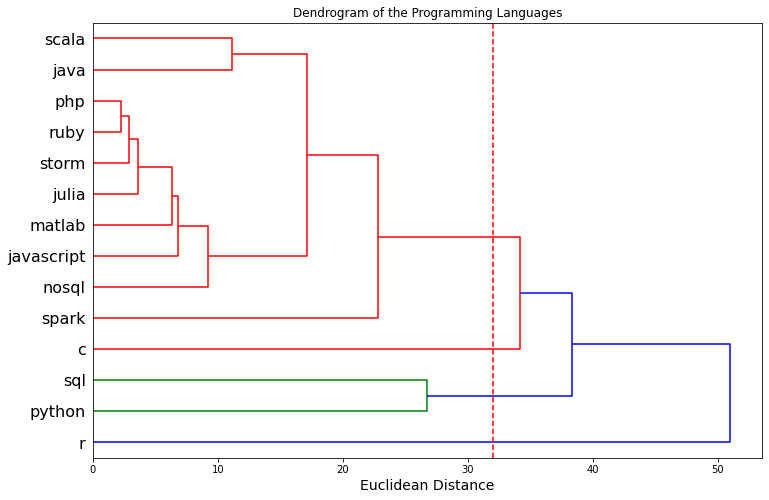

In [30]:
plt.figure(figsize = (12,8))
den_lang = get_dendrogram(lang_df) #3 clusters (3 blue lines)
plt.xlabel('Euclidean Distance', fontsize = 14)
plt.yticks(fontsize = 16)
plt.title('Dendrogram of the Programming Languages')
plt.axvline(x=32, color='r', linestyle='--')
plt.show()

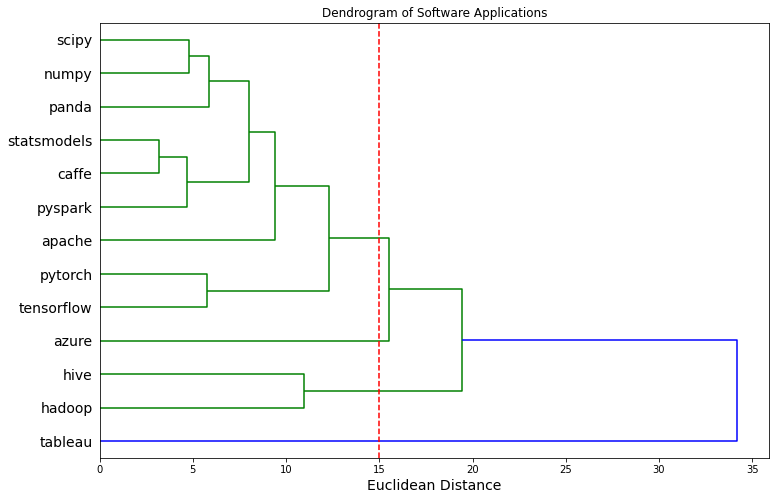

In [31]:
plt.figure(figsize = (12,8))
den_soft = get_dendrogram(softlib_df)
plt.xlabel('Euclidean Distance', fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Dendrogram of Software Applications')
plt.axvline(x = 15, color='r', linestyle='--')
plt.show()

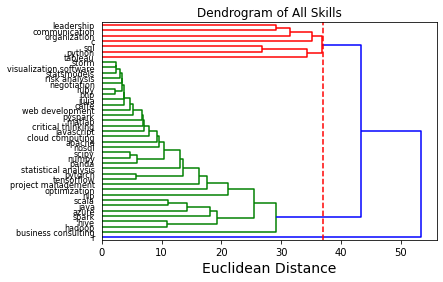

In [32]:
full_table = pd.DataFrame()
full = skills_list + langlist + softlib

full_table = get_hi(full, what)
full_dend = get_dendrogram(full_table)

plt.xlabel('Euclidean Distance', fontsize = 14)
plt.title('Dendrogram of All Skills')
plt.axvline(x = 37, color='r', linestyle='--')
plt.show()

#full_table = full_table.append(lang_df)
#full_table = full_table.append(skills_df)
#full_table = full_table.append(softlib_df)
#full_table.head()


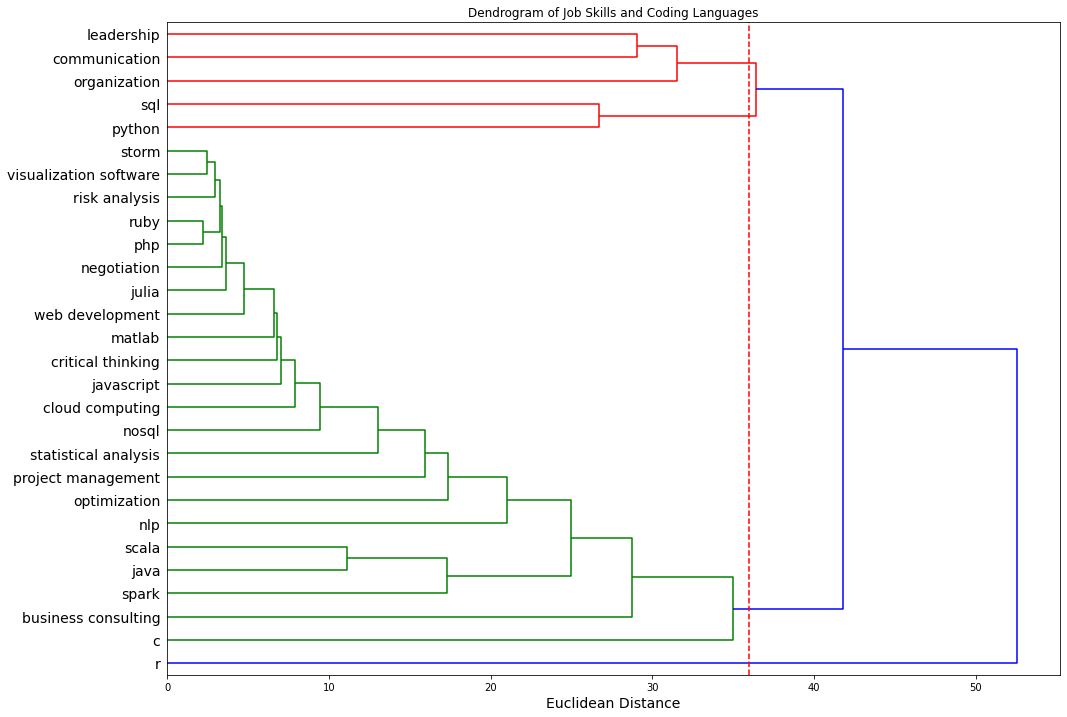

In [33]:
two_table = pd.DataFrame()
two = skills_list + langlist
plt.figure(figsize = (16,12))
two_table = get_hi(two, what)

two_dend = get_dendrogram(two_table)
plt.xlabel('Euclidean Distance', fontsize = 14)
plt.yticks(fontsize = 14)
plt.title('Dendrogram of Job Skills and Coding Languages')
plt.axvline(x = 36, color='r', linestyle='--')
plt.show()

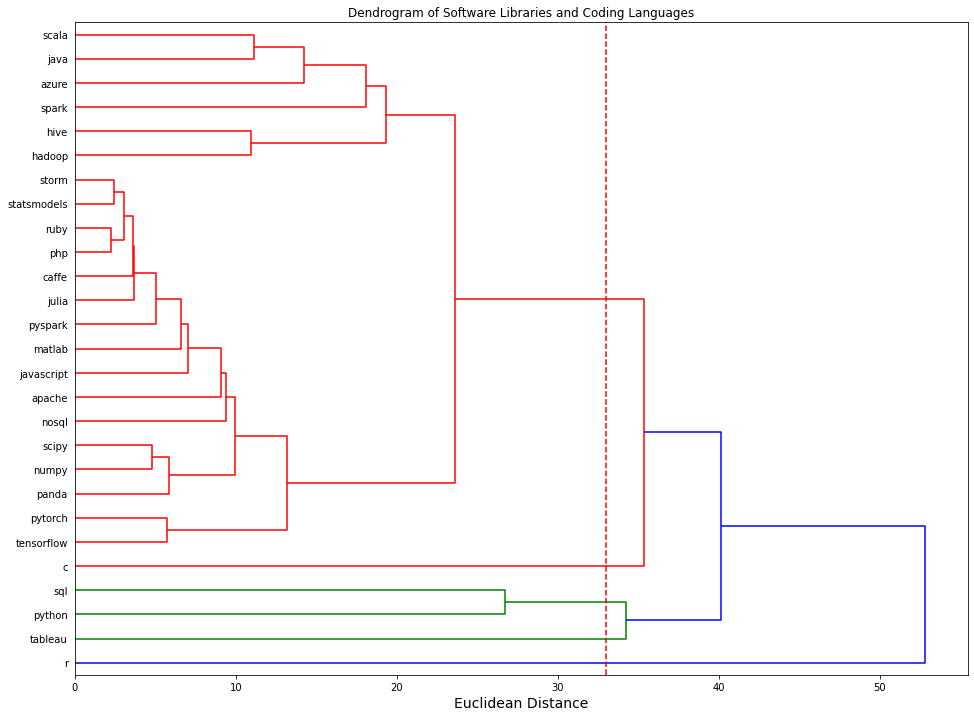

In [34]:
two_two_table = pd.DataFrame()
two_two = softlib + langlist

two_two_table = get_hi(two_two, what)
plt.figure(figsize = (16,12))
two_two_dend = get_dendrogram(two_two_table)
plt.xlabel('Euclidean Distance', fontsize = 14)
plt.title('Dendrogram of Software Libraries and Coding Languages')
plt.axvline(x = 33, color='r', linestyle='--')
plt.show()